<Axes: >

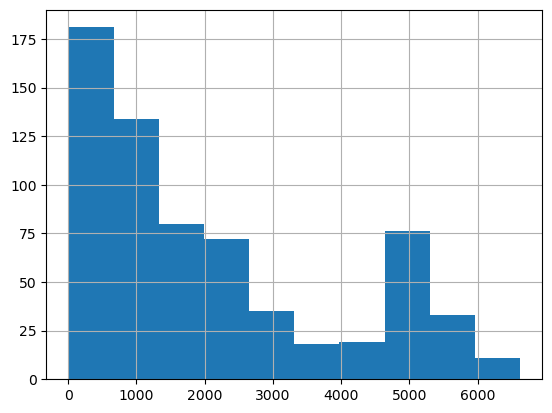

In [9]:
import os
os.chdir("/DeepenData/Repos/Flux_v0")
import warnings
warnings.filterwarnings("ignore")
import time

import releases.simv6_1 as sim


dataset = sim.DatasetTTP.desde_csv_atenciones("data/fonasa_monjitas.csv.gz")  # IdOficina=2)
un_dia = dataset.un_dia("2023-05-15").sort_values(by="FH_Emi", inplace=False)
skills = sim.obtener_skills(un_dia)
#########################
#---Ver tiempos de espera históricos---
#########################
un_dia.T_Esp.hist()

len(registros_atenciones) = 617, len(fila) = 42
tiempo total: 3.5 segundos


<Axes: >

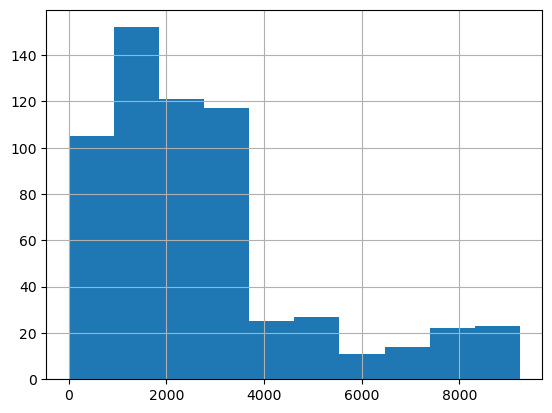

In [10]:


planificacion = sim.plan_desde_skills(skills, inicio="08:00:00", porcentaje_actividad=.85)

start_time = time.time()
hora_cierre = "15:30:00"
registros_atenciones, fila = sim.simv06(
                                        un_dia, hora_cierre, planificacion)
print(f"{len(registros_atenciones) = }, {len(fila) = }")
end_time = time.time()
print(f"tiempo total: {end_time - start_time:.1f} segundos")
#########################
#---Ver tiempos de espera simulados---
#########################
registros_atenciones.espera.hist()